In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('user_behavior_dataset.csv')

In [3]:
df.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [5]:
df.isnull().sum()/df.shape[0]

User ID                       0.0
Device Model                  0.0
Operating System              0.0
App Usage Time (min/day)      0.0
Screen On Time (hours/day)    0.0
Battery Drain (mAh/day)       0.0
Number of Apps Installed      0.0
Data Usage (MB/day)           0.0
Age                           0.0
Gender                        0.0
User Behavior Class           0.0
dtype: float64

In [6]:
df.columns.tolist()

['User ID',
 'Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

In [7]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


C:\Users\emirh\AppData\Local\Temp\ipykernel_11744\1797378758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = "Gender", kind="count", palette = gender_color, legend=False)


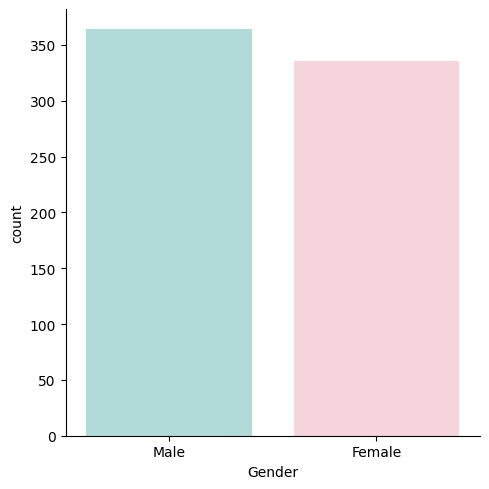

In [8]:
gender_color = {"Male":"#aae2df", "Female":"#facfd9"}
sns.catplot(data = df, x = "Gender", kind="count", palette = gender_color, legend=False)
plt.show()

In [9]:
label_encoder = LabelEncoder()
df.insert(2, "Gender_Label", label_encoder.fit_transform(df["Gender"]))
encoder = LabelEncoder()
df.insert(4, "Operating_System_Label", label_encoder.fit_transform(df["Operating System"]))

In [10]:
print(df)

     User ID        Device Model  Gender_Label Operating System  \
0          1      Google Pixel 5             1          Android   
1          2           OnePlus 9             0          Android   
2          3        Xiaomi Mi 11             1          Android   
3          4      Google Pixel 5             1          Android   
4          5           iPhone 12             0              iOS   
..       ...                 ...           ...              ...   
695      696           iPhone 12             1              iOS   
696      697        Xiaomi Mi 11             1          Android   
697      698      Google Pixel 5             0          Android   
698      699  Samsung Galaxy S21             1          Android   
699      700           OnePlus 9             0          Android   

     Operating_System_Label  App Usage Time (min/day)  \
0                         0                       393   
1                         0                       268   
2                       

In [15]:
one_encoder = OneHotEncoder(sparse=False)
encoded_data = one_encoder.fit_transform(df["Device Model"].values.reshape(-1,1))
encoded_device_model_df = pd.DataFrame(
    encoded_data,
    columns=one_encoder.get_feature_names_out(['Device Model'])
)
data_with_encoded_device_model = pd.concat([df, encoded_device_model_df], axis=1)

C:\Users\emirh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
df = data_with_encoded_device_model
df.head()

,User ID,Device Model,Gender_Label,Operating System,Operating_System_Label,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,Google Pixel 5,1,Android,0,393,6.4,1872,67,1122,40,Male,4,1.0,0.0,0.0,0.0,0.0
1,2,OnePlus 9,0,Android,0,268,4.7,1331,42,944,47,Female,3,0.0,1.0,0.0,0.0,0.0
2,3,Xiaomi Mi 11,1,Android,0,154,4.0,761,32,322,42,Male,2,0.0,0.0,0.0,1.0,0.0
3,4,Google Pixel 5,1,Android,0,239,4.8,1676,56,871,20,Male,3,1.0,0.0,0.0,0.0,0.0
4,5,iPhone 12,0,iOS,1,187,4.3,1367,58,988,31,Female,3,0.0,0.0,0.0,0.0,1.0


In [25]:
df.drop(columns=["User ID"], inplace=True)
df.drop(columns=["Device Model"], inplace=True)
df.drop(columns=["Operating System"],inplace=True)
df.drop(columns=["Gender"],inplace=True)

In [26]:
df.head()

,Gender_Label,Operating_System_Label,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,0,393,6.4,1872,67,1122,40,4,1.0,0.0,0.0,0.0,0.0
1,0,0,268,4.7,1331,42,944,47,3,0.0,1.0,0.0,0.0,0.0
2,1,0,154,4.0,761,32,322,42,2,0.0,0.0,0.0,1.0,0.0
3,1,0,239,4.8,1676,56,871,20,3,1.0,0.0,0.0,0.0,0.0
4,0,1,187,4.3,1367,58,988,31,3,0.0,0.0,0.0,0.0,1.0


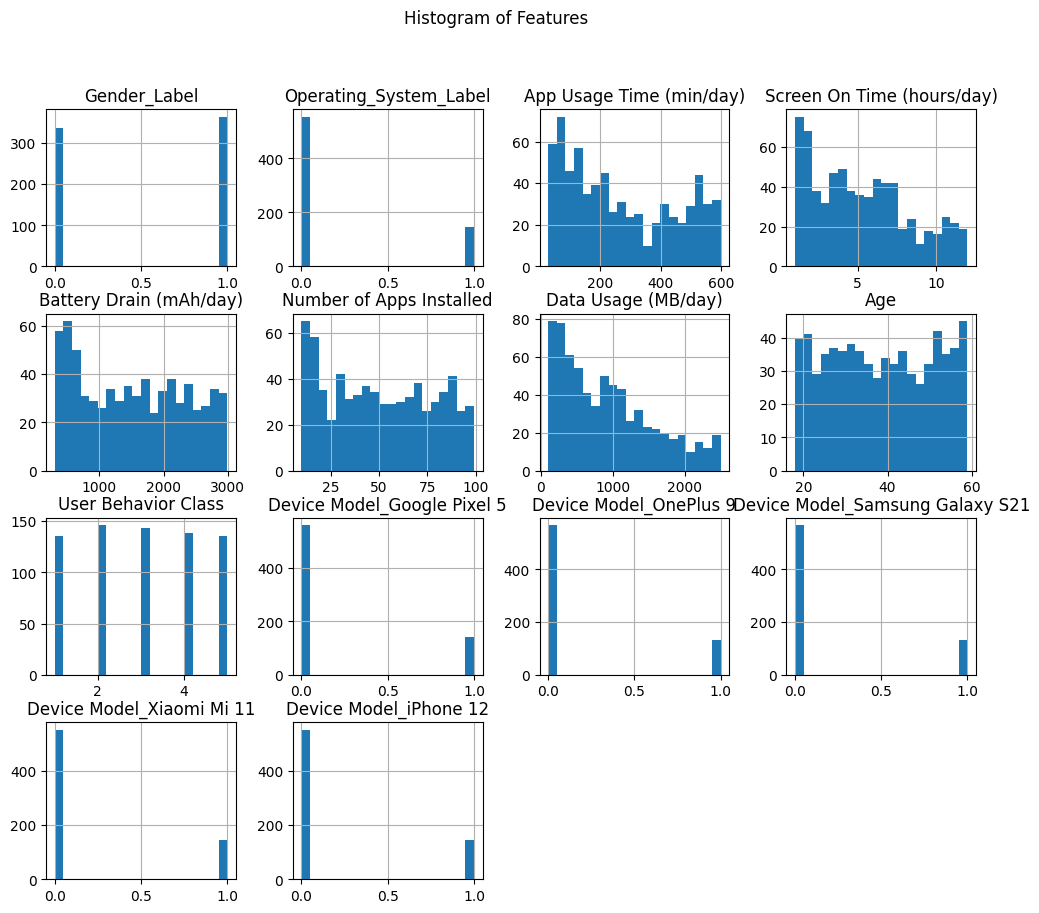

In [27]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogram of Features")
plt.show()